In [85]:
import pandas as pd
import jieba
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [86]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号


In [87]:
excel_path = 'filter_by_words_2.xlsx'
df = pd.read_excel(excel_path, engine='openpyxl')
df.columns

Index(['基金名', '基金类别', '项目名(官方语言)', '项目主持人', '项目承担机构', '立项年度', '受资金额'], dtype='object')

In [88]:
jieba.load_userdict('personal_dict.txt')


In [89]:
text = ' '.join(df[df.columns[2]].dropna().astype(str).values)  # 将所有单元格内容合并为一个字符串
words = jieba.lcut(text)

ban_words = [' ', '基于', '的', '研究', '面向', '和', '与', '下', '关键技术', '及', '及其', '多', '中', '-', ':',
             '—', '在', '对', '大', '；', '：', '、', '/', '高', '自', '非', '可', '方法', '机制', '', '识别', '模型', '预测', '技术',
             '应用', '数据', '学习', '深度', '算法', '网络', '优化', '系统', '分析', '构建', '环境', '建模', '特征', '结构', '机理', '评估',
             '复杂', '设计', '功能', '适应','隐私', '智能', '理论', '协同', '驱动','控制','信息','辅助','知识','场景','风险','多源','计算','调控','神经','融合']

filtered_words = [word for word in words if word not in ban_words]
for i, word in enumerate(filtered_words):
    if word == '脑':
        filtered_words[i] = '类脑'
    if word == '图':
        filtered_words[i] = '图网络'



In [90]:
counter = Counter(filtered_words)
most_common_words = counter.most_common(30)


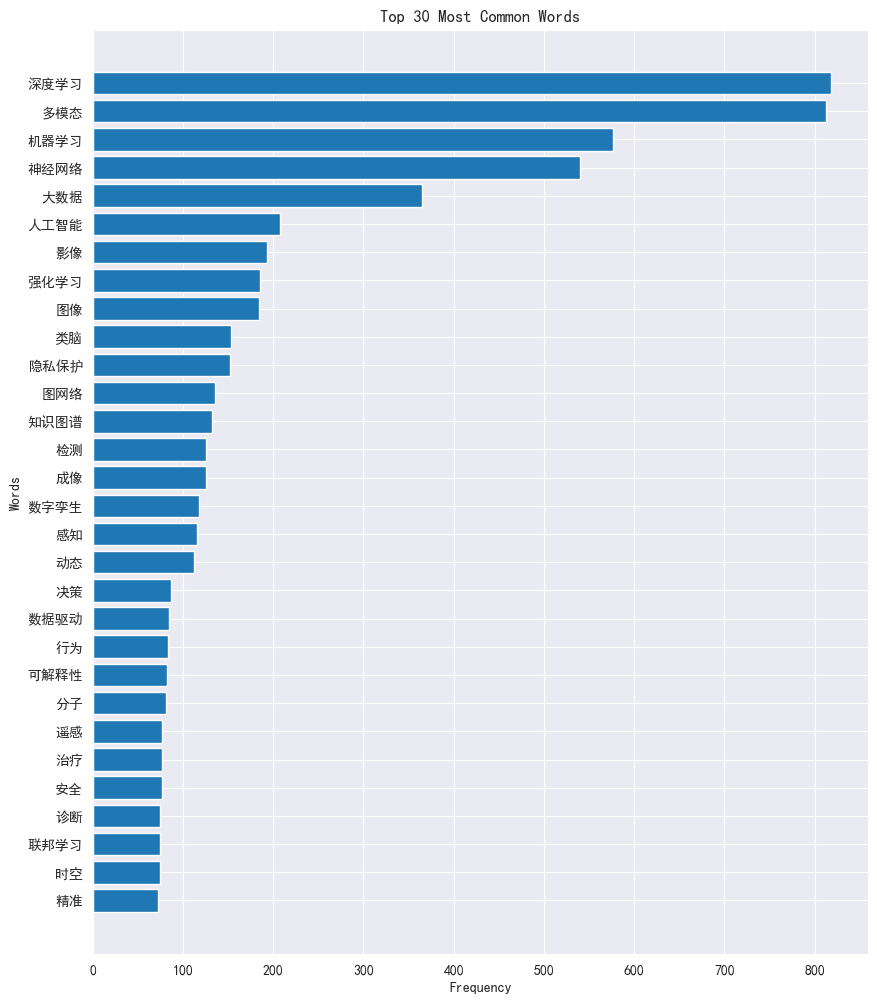

In [91]:
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 12))
plt.barh(words, frequencies)
plt.title('Top 30 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # 颠倒y轴，让最高的条在上面
plt.show()

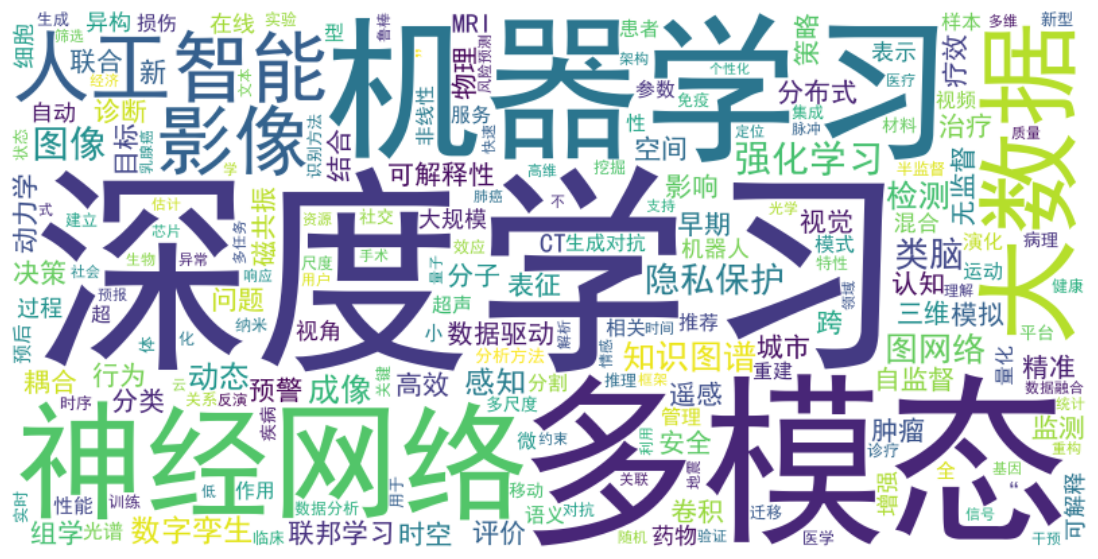

In [92]:
wordcloud = WordCloud(font_path='simhei.ttf', width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(counter)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.show()

In [53]:
words

('深度学习',
 '多模态',
 '机器学习',
 '神经网络',
 '大数据',
 '融合',
 '智能',
 '理论',
 '人工智能',
 '影像',
 '强化学习',
 '图像',
 '隐私保护',
 '知识图谱',
 '图',
 '协同',
 '检测',
 '成像',
 '数字孪生',
 '感知',
 '驱动',
 '动态',
 '计算',
 '控制',
 '信息',
 '辅助',
 '诊断',
 '决策',
 '知识',
 '场景')